# TASK4 : EMAIL SPAM DETECTION WITH MACHINE LEARNING

**TASK DESCRIPTION:** We’ve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email
that is sent to a massive number of users at one time, frequently containing cryptic
messages, scams, or most dangerously, phishing content.


In this Project, use Python to build an email spam detector. Then, use machine learning to
train the spam detector to recognize and classify emails into spam and non-spam. Let’s get
started

# Importing Libraries

In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [127]:
df=pd.read_csv('spam.csv',encoding = "latin1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


# Data Specifications and Information

In [128]:
df.size

27860

In [129]:
df.shape

(5572, 5)

In [130]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [132]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [133]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [134]:
df.tail(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5562,ham,Ok lor... Sony ericsson salesman... I ask shuh...,NaN,NaN,NaN
5563,ham,Ard 6 like dat lor.,NaN,NaN,NaN
5564,ham,Why don't you wait 'til at least wednesday to ...,NaN,NaN,NaN
5565,ham,Huh y lei...,NaN,NaN,NaN
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,NaN,NaN,NaN
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


# Data Preprocessing

In [158]:
df.isnull().sum()

spam/ham    0
sms         0
dtype: int64

these three columns has huge number count of null values,so we need to remove these columns

Unnamed: 2    5522

Unnamed: 3    5560

Unnamed: 4    5566


In [136]:
df.drop(columns=df[['Unnamed: 2','Unnamed: 3','Unnamed: 4']],axis=1,inplace=True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [137]:
rows=df.shape[0]
columns=df.shape[1]
print(rows)
print(columns)

5572
2


# Rename columns names for easier understanding


# Convert the text data into numerical form

In [138]:
df.columns=['spam/ham','sms']
df.loc[df['spam/ham'] == 'spam', 'spam/ham',] = 0
df.loc[df['spam/ham'] == 'ham', 'spam/ham',] = 1
df

,spam/ham,sms
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will Ì_ b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


Here we renamed the columns to spam/ham and the sms.

So,we can easily seperate the spam and ham values in terms of 0 and 1 simultaneously.

In [139]:
x=df.sms
y=df['spam/ham']

In [140]:
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: sms, Length: 5572, dtype: object

In [141]:
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: spam/ham, Length: 5572, dtype: object

# Training and Testing the Model

In [142]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=3)

In [143]:
print(x.shape)

(5572,)


In [144]:
print(xtrain.shape)
print(xtest.shape)

(4457,)
(1115,)


In [145]:
xtrain,xtest

(3075    Mum, hope you are having a great day. Hoping t...
 1787                           Yes:)sura in sun tv.:)lol.
 1614    Me sef dey laugh you. Meanwhile how's my darli...
 4304                Yo come over carlos will be here soon
 3266                    Ok then i come n pick u at engin?
                               ...                        
 789                          Gud mrng dear hav a nice day
 968             Are you willing to go for aptitude class.
 1667    So now my dad is gonna call after he gets out ...
 3321    Ok darlin i supose it was ok i just worry too ...
 1688                     Nan sonathaya soladha. Why boss?
 Name: sms, Length: 4457, dtype: object,
 2632                       I WILL CAL YOU SIR. In meeting
 454     Loan for any purpose å£500 - å£75,000. Homeown...
 983     LOOK AT THE FUCKIN TIME. WHAT THE FUCK YOU THI...
 1282    Ever green quote ever told by Jerry in cartoon...
 4610                                  Wat time Ì_ finish?
               

In [146]:
ytrain,ytest

(3075    1
 1787    1
 1614    1
 4304    1
 3266    1
        ..
 789     1
 968     1
 1667    1
 3321    1
 1688    1
 Name: spam/ham, Length: 4457, dtype: object,
 2632    1
 454     0
 983     1
 1282    1
 4610    1
        ..
 4827    1
 5291    1
 3325    1
 3561    1
 1136    0
 Name: spam/ham, Length: 1115, dtype: object)

# As we know that,machine learning algorithms only performs well with respect to numbers,so we need to convert all the text data into numbers.To do so I will use "TfidfVectorizer techinque" from FeatureExtraction of sklearn.

In [151]:
from sklearn.feature_extraction.text import TfidfVectorizer
feature_vec=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)
feature_vec

TfidfVectorizer(stop_words='english')

In [152]:
ytrain=ytrain.astype('int')
ytest=ytest.astype('int')
xtrain_vec =feature_vec.fit_transform(xtrain)
xtest_vec =feature_vec.transform(xtest)

In [154]:
print(xtrain)

3075    Mum, hope you are having a great day. Hoping t...
1787                           Yes:)sura in sun tv.:)lol.
1614    Me sef dey laugh you. Meanwhile how's my darli...
4304                Yo come over carlos will be here soon
3266                    Ok then i come n pick u at engin?
                              ...                        
789                          Gud mrng dear hav a nice day
968             Are you willing to go for aptitude class.
1667    So now my dad is gonna call after he gets out ...
3321    Ok darlin i supose it was ok i just worry too ...
1688                     Nan sonathaya soladha. Why boss?
Name: sms, Length: 4457, dtype: object


In [155]:
print(xtest)

2632                       I WILL CAL YOU SIR. In meeting
454     Loan for any purpose å£500 - å£75,000. Homeown...
983     LOOK AT THE FUCKIN TIME. WHAT THE FUCK YOU THI...
1282    Ever green quote ever told by Jerry in cartoon...
4610                                  Wat time Ì_ finish?
                              ...                        
4827    Lol no. Just trying to make your day a little ...
5291      Xy trying smth now. U eat already? We havent...
3325    Huh so fast... Dat means u havent finished pai...
3561    Still chance there. If you search hard you wil...
1136    Dont forget you can place as many FREE Request...
Name: sms, Length: 1115, dtype: object


In [156]:
print(xtrain_vec)

  (0, 741)	0.3219352588930141
  (0, 3979)	0.2410582143632299
  (0, 4296)	0.3891385935794867
  (0, 6599)	0.20296878731699391
  (0, 3386)	0.3219352588930141
  (0, 2122)	0.38613577623520473
  (0, 3136)	0.440116181574609
  (0, 3262)	0.25877035357606315
  (0, 3380)	0.21807195185332803
  (0, 4513)	0.2909649098524696
  (1, 4061)	0.380431198316959
  (1, 6872)	0.4306015894277422
  (1, 6417)	0.4769136859540388
  (1, 6442)	0.5652509076654626
  (1, 7443)	0.35056971070320353
  (2, 933)	0.4917598465723273
  (2, 2109)	0.42972812260098503
  (2, 3917)	0.40088501350982736
  (2, 2226)	0.413484525934624
  (2, 5825)	0.4917598465723273
  (3, 6140)	0.4903863168693604
  (3, 1599)	0.5927091854194291
  (3, 1842)	0.3708680641487708
  (3, 7453)	0.5202633571003087
  (4, 2531)	0.7419319091456392
  :	:
  (4452, 2122)	0.31002103760284144
  (4453, 999)	0.6760129013031282
  (4453, 7273)	0.5787739591782677
  (4453, 1762)	0.45610005640082985
  (4454, 3029)	0.42618909997886
  (4454, 2086)	0.3809693742808703
  (4454, 3088)

In [157]:
print(xtest_vec)

  (0, 6007)	0.537093591660729
  (0, 4294)	0.5159375448718375
  (0, 1537)	0.667337188824809
  (1, 7222)	0.23059492898537967
  (1, 6599)	0.14954692788663673
  (1, 6579)	0.2733682162643466
  (1, 5501)	0.28671640581392144
  (1, 5347)	0.2733682162643466
  (1, 5250)	0.28671640581392144
  (1, 4045)	0.250549335510249
  (1, 3365)	0.28671640581392144
  (1, 3300)	0.37297727661877506
  (1, 2899)	0.1385795841356552
  (1, 602)	0.28671640581392144
  (1, 520)	0.19344507865262492
  (1, 321)	0.28671640581392144
  (1, 43)	0.24547458936715758
  (1, 1)	0.21260233518669946
  (2, 6701)	0.30969080396105314
  (2, 6648)	0.3410121739015846
  (2, 4070)	0.44361668503137164
  (2, 2941)	0.6068486133983123
  (2, 2939)	0.47195476517479323
  (3, 7101)	0.29334330258175106
  (3, 6746)	0.2031810874151213
  :	:
  (1111, 7415)	0.4945753828645536
  (1111, 6848)	0.39685462025643714
  (1111, 6093)	0.4671914311419049
  (1111, 3259)	0.4477622081928626
  (1111, 2458)	0.42325261089251354
  (1112, 4903)	0.4770390302498559
  (1112, 

# Model Building

# RandomForestClassifier:
Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.

In [102]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier()
model1.fit(x_train, y_train)
pred1 = model1.predict(x_test)
print("Random Forest Classifier:")
print("Confusion Matrix: ")
print(confusion_matrix(y_test, pred1))
print("Accuracy: ", accuracy_score(y_test, pred1))

Random Forest Classifier:
Confusion Matrix: 
[[127  23]
 [  1 964]]
Accuracy:  0.97847533632287


# DecisionTreeClassifier:
DecisionTreeClassifier is a class capable of performing multi-class classification on a dataset. In case that there are multiple classes with the same and highest probability, the classifier will predict the class with the lowest index amongst those classes.

In [100]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
model2.fit(x_train, y_train)
pred2 = model2.predict(x_test)
print("Decision Tree Classifier:")
print("Confusion Matrix: ")
print(confusion_matrix(y_test, pred2))
print("Accuracy: ", accuracy_score(y_test, pred2))

Decision Tree Classifier:
Confusion Matrix: 
[[127  23]
 [ 12 953]]
Accuracy:  0.968609865470852


# MultinomialNB(Naive Bayes):
The Multinomial Naive Bayes algorithm is a Bayesian learning approach popular in Natural Language Processing (NLP). The program guesses the tag of a text, such as an email or a newspaper story, using the Bayes theorem. It calculates each tag's likelihood for a given sample and outputs the tag with the greatest chance.

In [109]:
from sklearn.naive_bayes import MultinomialNB
model3 = MultinomialNB()
model3.fit(x_train, y_train)
pred3 = model3.predict(x_test)
print("Multinomial Naïve Bayes")
print("Confusion Matrix: ")
print(confusion_matrix(y_test, pred3))
print("Accuracy: ", accuracy_score(y_test, pred3))

Multinomial Naïve Bayes
Confusion Matrix: 
[[113  37]
 [  0 965]]
Accuracy:  0.9668161434977578


In [114]:
cm = confusion_matrix(y_test, pred1)

<AxesSubplot:>

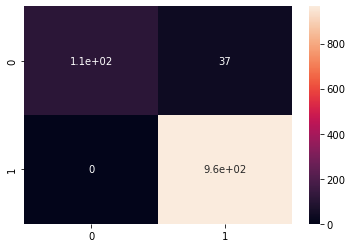

In [112]:
sns.heatmap(cm, annot=True)

<AxesSubplot:>

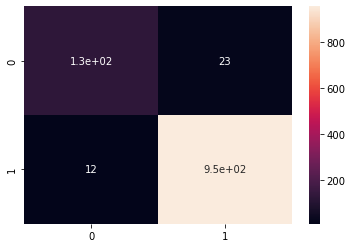

In [113]:
cm = confusion_matrix(y_test, pred2)
sns.heatmap(cm, annot=True)

<AxesSubplot:>

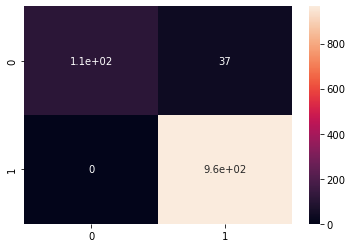

In [115]:
cm = confusion_matrix(y_test, pred3)
sns.heatmap(cm, annot=True)

In [119]:
from sklearn.metrics import classification_report
report1 = classification_report(y_test, pred1)
print("RandomForestClassifier:\n", report1)
print("__________________________________________________________")
report2 = classification_report(y_test, pred2)
print("DecisionTreeClassifier:\n", report2)
print("__________________________________________________________")
report3 = classification_report(y_test, pred3)
print("MultinomialNB:\n", report3)
print("__________________________________________________________")

RandomForestClassifier:
               precision    recall  f1-score   support

           0       0.99      0.85      0.91       150
           1       0.98      1.00      0.99       965

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

__________________________________________________________
DecisionTreeClassifier:
               precision    recall  f1-score   support

           0       0.91      0.85      0.88       150
           1       0.98      0.99      0.98       965

    accuracy                           0.97      1115
   macro avg       0.95      0.92      0.93      1115
weighted avg       0.97      0.97      0.97      1115

__________________________________________________________
MultinomialNB:
               precision    recall  f1-score   support

           0       1.00      0.75      0.86       150
           1       0.96      1.00      0.98       965